In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import sodapy
import datetime as dt
import openweathermapy.core as owm

In [2]:
Unemployment_Crime_Data = pd.read_csv('Unemployment_Crime_Data.csv')
CA_Unemployment_Crime_Data = pd.read_csv('CA_Unemployment_Crime_Data.csv')
CA_Unemployment_Crime_Data = pd.read_csv('CA_Unemployment_Crime_Data.csv')
SF_Unemployment_Crime_Data = pd.read_csv('SF_Unemployment_Crime_Data.csv')
OAK_Unemployment_Crime_Data = pd.read_csv('OAK_Unemployment_Crime_Data.csv')
LA_Unemployment_Crime_Data = pd.read_csv('LA_Unemployment_Crime_Data.csv')

In [3]:
Unemployment_Crime_Data.head()

,Area_Name,Date,Year,Month,Labor_Force,Employment,Unemployment,Unemployment_Rate,Crime_Rate
0,CA,1/1/10,2010,January,18178400,15863100,2315200,13,3069
1,CA,2/1/10,2010,February,18231500,15931100,2300400,13,3069
2,CA,3/1/10,2010,March,18283000,15970700,2312400,13,3069
3,CA,4/1/10,2010,April,18357600,16156400,2201200,12,3069
4,CA,5/1/10,2010,May,18318800,16178500,2140300,12,3069


In [4]:
Unemployment_Crime_Data.count()

Area_Name             470
Date                  470
Year                  470
Month                 470
Labor_Force           470
Employment            470
Unemployment          470
Unemployment_Rate     470
Crime_Rate            470
dtype: int64

In [5]:
Unemployment_Crime_Data.head()

,Area_Name,Date,Year,Month,Labor_Force,Employment,Unemployment,Unemployment_Rate,Crime_Rate
0,CA,1/1/10,2010,January,18178400,15863100,2315200,13,3069
1,CA,2/1/10,2010,February,18231500,15931100,2300400,13,3069
2,CA,3/1/10,2010,March,18283000,15970700,2312400,13,3069
3,CA,4/1/10,2010,April,18357600,16156400,2201200,12,3069
4,CA,5/1/10,2010,May,18318800,16178500,2140300,12,3069


In [6]:
list(Unemployment_Crime_Data.columns.values)

['Area_Name',
 'Date',
 'Year',
 'Month',
 'Labor_Force',
 'Employment',
 'Unemployment',
 'Unemployment_Rate ',
 'Crime_Rate']

In [7]:
Unemployment_Crime_Data.dtypes

Area_Name             object
Date                  object
Year                   int64
Month                 object
Labor_Force            int64
Employment             int64
Unemployment           int64
Unemployment_Rate      int64
Crime_Rate             int64
dtype: object

In [8]:
columns_to_keep = ['Area_Name', 'Date', 'Year', 'Unemployment', 'Unemployment_Rate ', 'Crime_Rate']
Summary_Data = Unemployment_Crime_Data[columns_to_keep]
Summary_Data.head()

,Area_Name,Date,Year,Unemployment,Unemployment_Rate,Crime_Rate
0,CA,1/1/10,2010,2315200,13,3069
1,CA,2/1/10,2010,2300400,13,3069
2,CA,3/1/10,2010,2312400,13,3069
3,CA,4/1/10,2010,2201200,12,3069
4,CA,5/1/10,2010,2140300,12,3069


In [9]:
Unemply_city_year = pd.DataFrame(Summary_Data.groupby(['Area_Name', 'Year']).mean()['Unemployment_Rate '])
Unemply_city_year = pd.pivot_table(Summary_Data, index='Year', columns='Area_Name', values='Unemployment_Rate ', aggfunc = np.mean)
Unemply_city_year

Area_Name,CA,LA,OAK,SF
Year,,,,
2010,12.333333,12.458333,10.916667,8.750000
2011,11.750000,12.125000,10.333333,7.916667
2012,10.416667,10.958333,8.750000,6.666667
2013,9.000000,9.791667,7.333333,5.416667
2014,7.500000,8.333333,6.083333,4.416667
2015,6.307692,6.708333,5.000000,3.500000
2016,5.538462,5.208333,4.500000,3.000000
2017,NaN,4.583333,3.583333,2.833333


In [10]:
Unemploy_Rate = Summary_Data.groupby(['Area_Name', 'Year']).mean()['Unemployment_Rate ']
Unemploy_Rate_df = pd.DataFrame(Unemploy_Rate)

In [11]:
Unemploy_error = Summary_Data.groupby(['Area_Name', 'Year']).mean()['Unemployment_Rate ']
Unemploy_error_df = pd.DataFrame(Unemploy_error)
Unemploy_error_df.head()

Unemployment_Rate 
Area_Name Year                    
CA        2010           12.333333
          2011           11.750000
          2012           10.416667
          2013            9.000000
          2014            7.500000

In [12]:
mean_reformat = Unemploy_Rate_df.reset_index()
mean_pivot = mean_reformat.pivot(index='Year', columns='Area_Name')['Unemployment_Rate ']

error_reformat = Unemploy_error_df.reset_index()
error_pivot = error_reformat.pivot(index='Year', columns='Area_Name')['Unemployment_Rate ']
mean_pivot.head()

Area_Name,CA,LA,OAK,SF
Year,,,,
2010,12.333333,12.458333,10.916667,8.750000
2011,11.750000,12.125000,10.333333,7.916667
2012,10.416667,10.958333,8.750000,6.666667
2013,9.000000,9.791667,7.333333,5.416667
2014,7.500000,8.333333,6.083333,4.416667


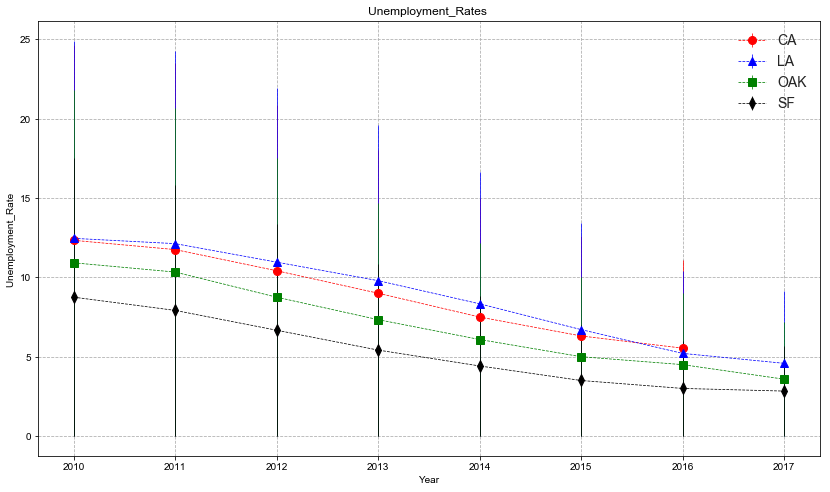

In [13]:
x_axis = np.arange(0, 50, 10)
x_limit = 50
plt.figure(figsize=(14,8))
plt.errorbar(mean_pivot.index, mean_pivot["CA"], yerr=error_pivot["CA"],\
             color="r", marker="o", markersize=8, linestyle="dashed", linewidth=0.75)
plt.errorbar(mean_pivot.index, mean_pivot["LA"], yerr=error_pivot["LA"],\
             color="b", marker="^", markersize=8, linestyle="dashed", linewidth=0.75)
plt.errorbar(mean_pivot.index, mean_pivot["OAK"],yerr=error_pivot["OAK"],\
             color="g", marker="s", markersize=8, linestyle="dashed", linewidth=0.75)
plt.errorbar(mean_pivot.index, mean_pivot["SF"],yerr=error_pivot["SF"],\
             color="k", marker="d", markersize=8, linestyle="dashed", linewidth=0.75)
plt.title("Unemployment_Rates ")
plt.xlabel('Year') 
plt.ylabel('Unemployment_Rate ')

plt.style.use('seaborn-whitegrid')
plt.grid(linestyle="dashed")

plt.grid(linestyle="dashed")
plt.legend(loc='best', fontsize=14, fancybox=True)

plt.savefig("Unemployment_Rate.png")
plt.show()

In [14]:
Crime_city_year = pd.DataFrame(Summary_Data.groupby(['Area_Name', 'Year']).mean()['Crime_Rate'])
Crime_city_year = pd.pivot_table(Summary_Data, index='Year', columns='Area_Name', values='Crime_Rate', aggfunc = np.mean)
Crime_city_year

Area_Name,CA,LA,OAK,SF
Year,,,,
2010,3069.0,2780.0,5551.0,4311.0
2011,2995.0,2659.0,6484.0,4328.0
2012,3185.0,2651.0,8072.0,5054.0
2013,3054.0,2559.0,7802.0,6266.0
2014,2838.0,2558.0,7359.0,5866.0
2015,3056.0,2966.0,7204.0,6757.0
2016,2995.0,3199.0,7061.0,6062.0
2017,NaN,3303.0,7281.0,6862.0


In [15]:
Crime_Rate = Summary_Data.groupby(['Area_Name', 'Year']).mean()['Crime_Rate']
Crime_Rate_df = pd.DataFrame(Crime_Rate)

In [16]:
Crime_error = Summary_Data.groupby(['Area_Name', 'Year']).mean()['Crime_Rate']
Crime_error_df = pd.DataFrame(Crime_error)
Crime_error_df.head()

Crime_Rate
Area_Name Year            
CA        2010      3069.0
          2011      2995.0
          2012      3185.0
          2013      3054.0
          2014      2838.0

In [17]:
mean_reformat = Crime_Rate_df.reset_index()
mean_pivot = mean_reformat.pivot(index='Year', columns='Area_Name')['Crime_Rate']

error_reformat = Crime_error_df.reset_index()
error_pivot = error_reformat.pivot(index='Year', columns='Area_Name')['Crime_Rate']
mean_pivot.head()

Area_Name,CA,LA,OAK,SF
Year,,,,
2010,3069.0,2780.0,5551.0,4311.0
2011,2995.0,2659.0,6484.0,4328.0
2012,3185.0,2651.0,8072.0,5054.0
2013,3054.0,2559.0,7802.0,6266.0
2014,2838.0,2558.0,7359.0,5866.0


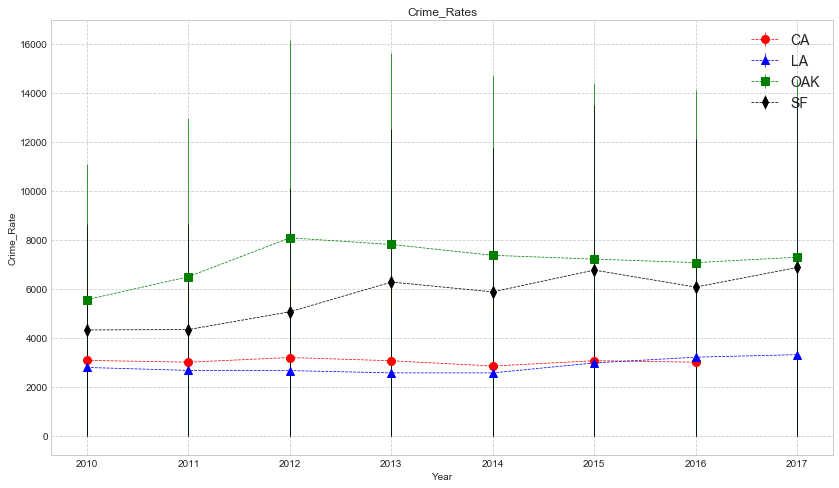

In [18]:
x_axis = np.arange(0, 50, 10)
x_limit = 50

plt.figure(figsize=(14,8))

plt.errorbar(mean_pivot.index, mean_pivot["CA"], yerr=error_pivot["CA"],\
             color="r", marker="o", markersize=8, linestyle="dashed", linewidth=0.75)
plt.errorbar(mean_pivot.index, mean_pivot["LA"], yerr=error_pivot["LA"],\
             color="b", marker="^", markersize=8, linestyle="dashed", linewidth=0.75)
plt.errorbar(mean_pivot.index, mean_pivot["OAK"],yerr=error_pivot["OAK"],\
             color="g", marker="s", markersize=8, linestyle="dashed", linewidth=0.75)
plt.errorbar(mean_pivot.index, mean_pivot["SF"],yerr=error_pivot["SF"],\
             color="k", marker="d", markersize=8, linestyle="dashed", linewidth=0.75)

plt.title('Crime_Rates')
plt.xlabel('Year')
plt.ylabel('Crime_Rate')

plt.style.use('seaborn-whitegrid')
plt.grid(linestyle="dashed")

plt.grid(linestyle="dashed")
plt.legend(loc='best', fontsize=14, fancybox=True)
plt.savefig('Crime_Rate.png')


In [19]:
Unemply_city_year = pd.DataFrame(Summary_Data.groupby(['Area_Name', 'Year']).mean()['Unemployment_Rate '])
Unemply_city_year = pd.pivot_table(Summary_Data, index='Year', columns='Area_Name', values='Unemployment_Rate ', aggfunc = np.mean)

Crime_city_year = pd.DataFrame(Summary_Data.groupby(['Area_Name', 'Year']).mean()['Crime_Rate'])
Crime_city_year = pd.pivot_table(Summary_Data, index='Year', columns='Area_Name', values='Crime_Rate', aggfunc = np.mean)

In [20]:
Unemploy_Rate = Summary_Data.groupby(['Area_Name', 'Year']).mean()['Unemployment_Rate ']
Unemploy_Rate_df = pd.DataFrame(Unemploy_Rate)

Crime_Rate = Summary_Data.groupby(['Area_Name', 'Year']).mean()['Crime_Rate']
Crime_Rate_df = pd.DataFrame(Crime_Rate)

In [21]:
Unemploy_error = Summary_Data.groupby(['Area_Name', 'Year']).mean()['Unemployment_Rate ']
Unemploy_error_df = pd.DataFrame(Unemploy_error)

Crime_error = Summary_Data.groupby(['Area_Name', 'Year']).mean()['Crime_Rate']
Crime_error_df = pd.DataFrame(Crime_error)

In [22]:
Unemployment_mean_reformat = Unemploy_Rate_df.reset_index()
Unemployment_mean_pivot = Unemployment_mean_reformat.pivot(index='Year', columns='Area_Name')['Unemployment_Rate ']
Unemployment_error_reformat = Unemploy_error_df.reset_index()
Unemployment_error_pivot = Unemployment_error_reformat.pivot(index='Year', columns='Area_Name')['Unemployment_Rate ']

Crime_mean_reformat = Crime_Rate_df.reset_index()
Crime_mean_pivot = Crime_mean_reformat.pivot(index='Year', columns='Area_Name')['Crime_Rate']
Crime_error_reformat = Crime_error_df.reset_index()
Crime_error_pivot = Crime_error_reformat.pivot(index='Year', columns='Area_Name')['Crime_Rate']

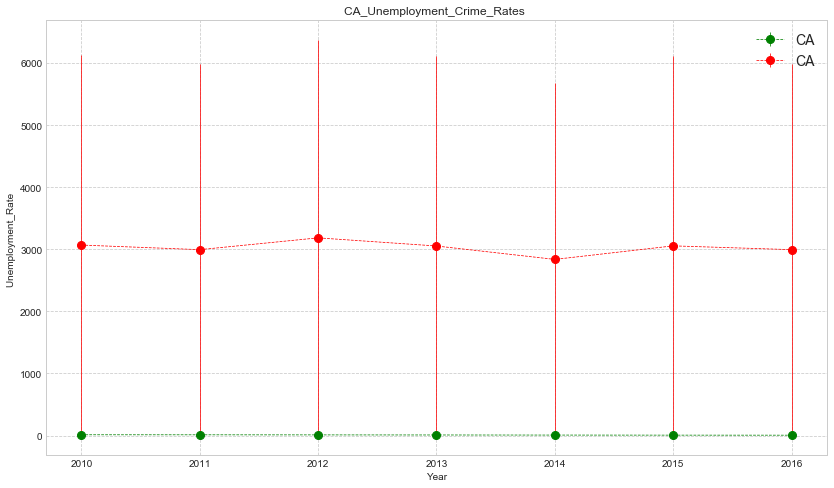

In [23]:
x_axis = np.arange(0, 50, 10)
x_limit = 50
plt.figure(figsize=(14,8))
plt.errorbar(Unemployment_mean_pivot.index, Unemployment_mean_pivot["CA"], yerr=Unemployment_error_pivot["CA"],\
             color="g", marker="o", markersize=8, linestyle="dashed", linewidth=0.75)
plt.errorbar(Crime_mean_pivot.index, Crime_mean_pivot["CA"], yerr=Crime_error_pivot["CA"],\
             color="r", marker="o", markersize=8, linestyle="dashed", linewidth=0.75)
plt.title("CA_Unemployment_Crime_Rates ")
plt.xlabel('Year')
plt.ylabel('Unemployment_Rate ')
plt.style.use('seaborn-whitegrid')
plt.grid(linestyle="dashed")
plt.grid(linestyle="dashed")
plt.legend(loc='best', fontsize=14, fancybox=True)
plt.savefig("Unemployment_Crime_Rate.png")
plt.show()

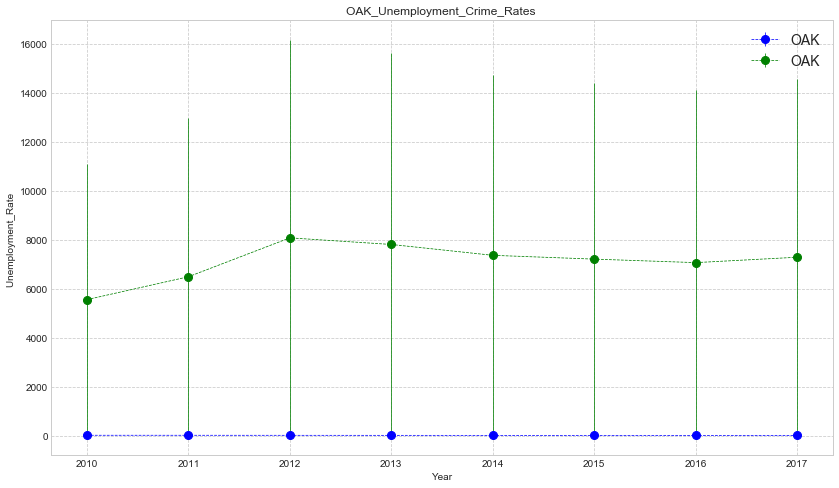

In [24]:
x_axis = np.arange(0, 50, 10)
x_limit = 50
plt.figure(figsize=(14,8))
plt.errorbar(Unemployment_mean_pivot.index, Unemployment_mean_pivot["OAK"], yerr=Unemployment_error_pivot["OAK"],\
             color="b", marker="o", markersize=8, linestyle="dashed", linewidth=0.75)
plt.errorbar(Crime_mean_pivot.index, Crime_mean_pivot["OAK"], yerr=Crime_error_pivot["OAK"],\
             color="g", marker="o", markersize=8, linestyle="dashed", linewidth=0.75)
plt.title("OAK_Unemployment_Crime_Rates ")
plt.xlabel('Year')
plt.ylabel('Unemployment_Rate ')
plt.style.use('seaborn-whitegrid')
plt.grid(linestyle="dashed")
plt.grid(linestyle="dashed")
plt.legend(loc='best', fontsize=14, fancybox=True)
plt.savefig("Unemployment_Crime_Rate.png")
plt.show()

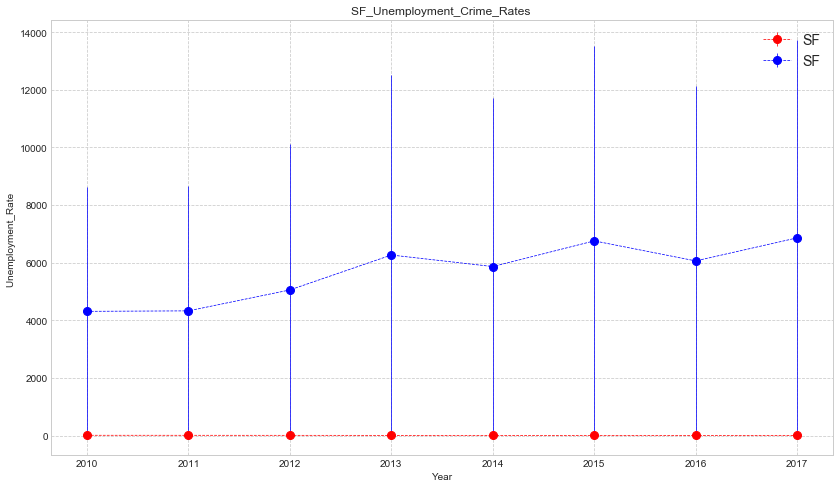

In [25]:
x_axis = np.arange(0, 50, 10)
x_limit = 50
plt.figure(figsize=(14,8))
plt.errorbar(Unemployment_mean_pivot.index, Unemployment_mean_pivot["SF"], yerr=Unemployment_error_pivot["SF"],\
             color="r", marker="o", markersize=8, linestyle="dashed", linewidth=0.75)
plt.errorbar(Crime_mean_pivot.index, Crime_mean_pivot["SF"], yerr=Crime_error_pivot["SF"],\
             color="b", marker="o", markersize=8, linestyle="dashed", linewidth=0.75)
plt.title("SF_Unemployment_Crime_Rates ")
plt.xlabel('Year')
plt.ylabel('Unemployment_Rate ')
plt.style.use('seaborn-whitegrid')
plt.grid(linestyle="dashed")
plt.grid(linestyle="dashed")
plt.legend(loc='best', fontsize=14, fancybox=True)
plt.savefig("Unemployment_Crime_Rate.png")
plt.show()

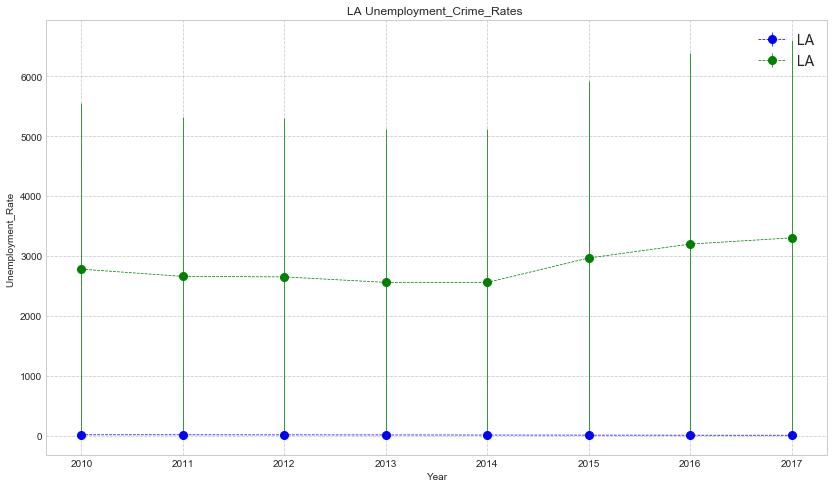

In [26]:
x_axis = np.arange(0, 50, 10)
x_axis = np.arange(0, 50, 10)
x_limit = 50
plt.figure(figsize=(14,8))
plt.errorbar(Unemployment_mean_pivot.index, Unemployment_mean_pivot["LA"], yerr=Unemployment_error_pivot["LA"],\
             color="b", marker="o", markersize=8, linestyle="dashed", linewidth=0.75)
plt.errorbar(Crime_mean_pivot.index, Crime_mean_pivot["LA"], yerr=Crime_error_pivot["LA"],\
             color="g", marker="o", markersize=8, linestyle="dashed", linewidth=0.75)
plt.title("LA Unemployment_Crime_Rates ")
plt.xlabel('Year')
plt.ylabel('Unemployment_Rate ')
plt.style.use('seaborn-whitegrid')
plt.grid(linestyle="dashed")
plt.grid(linestyle="dashed")
plt.legend(loc='best', fontsize=14, fancybox=True)
plt.savefig("Unemployment_Crime_Rate.png")
plt.show()